In [40]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

In [59]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print ('Total Training Images in Dataset = {0}'.format(mnist.train.images.shape))
print ('Total Test Examples in Dataset = {0}'.format(mnist.test.images.shape))

IMGSIZE = int(np.sqrt(mnist.test.images.shape[1]))
NCLASS = 10
LEARNING_RATE = 0.1
EPOCHS = 100

print('Image size is {0}'.format(IMGSIZE))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Total Training Images in Dataset = (55000, 784)
Total Test Examples in Dataset = (10000, 784)
Image size is 28


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random as ran

In [5]:
%matplotlib notebook 

In [23]:
def LoadTrain(num):
    x_train = mnist.train.images[:num,:]
    y_train = mnist.train.labels[:num,:]
    
    print ('x_train Examples Loaded = {0}'.format(x_train.shape))
    print ('y_train Examples Loaded = {0}'.format(y_train.shape))
    return x_train, y_train

def LoadTest(num):
    
    x_test = mnist.test.images[:num,:]
    y_test = mnist.test.labels[:num,:]
    
    print ('x_test Examples Loaded = {0}'.format(x_test.shape))
    print ('y_test Examples Loaded = {0}'.format(y_test.shape))
    return x_test, y_test

In [36]:
def DisplayDigit(num, size=28):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([size,size])
    plt.title('Example: {0}  Label: {1}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [26]:
x_train, y_train = LoadTrain(55000)

x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)


[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


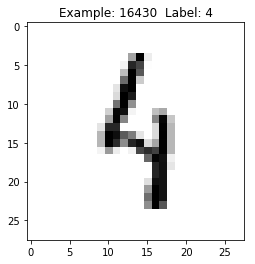

In [38]:
DisplayDigit(ran.randint(0, x_train.shape[0]))

In [41]:
sess = tf.Session()

In [42]:
x = tf.placeholder(tf.float32, shape=[None, IMGSIZE*IMGSIZE])

In [47]:
y = tf.placeholder(tf.float32, shape=[None, NCLASS])


In [46]:
W = tf.Variable(tf.zeros([IMGSIZE*IMGSIZE,NCLASS]))
b = tf.Variable(tf.zeros([NCLASS]))

In [48]:
y_hat = tf.nn.softmax(tf.matmul(x,W) + b)

In [53]:
x_train, y_train = LoadTrain(10)
init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(y_hat, feed_dict={x: x_train}))

x_train Examples Loaded = (10, 784)
y_train Examples Loaded = (10, 10)
[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]


In [55]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_hat))
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)


<IPython.core.display.Javascript object>


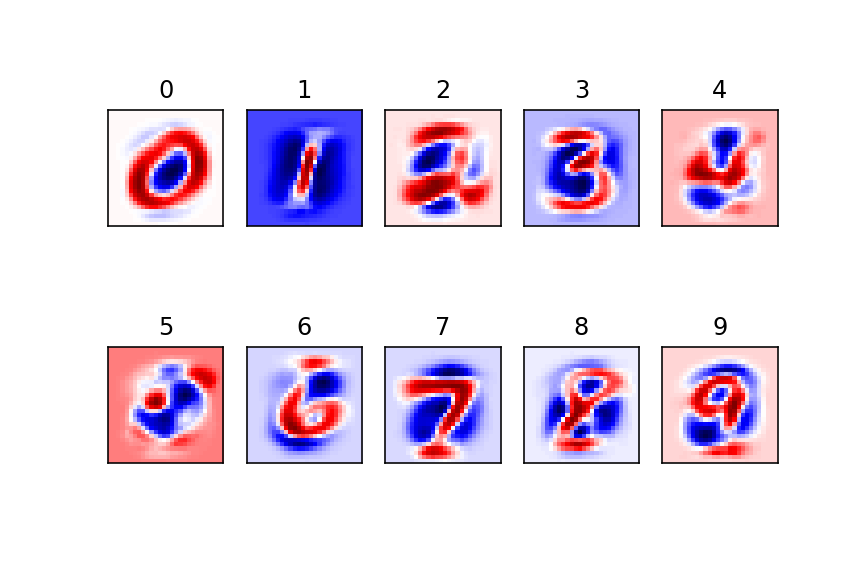

Train: 0.3778909146785736, Test: 0.3765000104904175
Train: 0.481145441532135, Test: 0.48590001463890076
Train: 0.42320001125335693, Test: 0.43070000410079956
Train: 0.36579999327659607, Test: 0.3693999946117401
Train: 0.3235454559326172, Test: 0.32330000400543213
Train: 0.33739998936653137, Test: 0.33809998631477356
Train: 0.29896363615989685, Test: 0.2994000017642975
Train: 0.2908909022808075, Test: 0.28940001130104065
Train: 0.3230181932449341, Test: 0.3294999897480011
Train: 0.28999999165534973, Test: 0.2896000146865845
Train: 0.30829089879989624, Test: 0.30399999022483826
Train: 0.3460727334022522, Test: 0.3409999907016754
Train: 0.41009092330932617, Test: 0.4131999909877777
Train: 0.4511090815067291, Test: 0.45500001311302185
Train: 0.4551818072795868, Test: 0.45820000767707825
Train: 0.4772363603115082, Test: 0.4778999984264374
Train: 0.47232726216316223, Test: 0.47290000319480896
Train: 0.47654545307159424, Test: 0.4758000075817108
Train: 0.4164363741874695, Test: 0.416900008916

In [94]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

fig,ax = plt.subplots(2,5)
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_xlim(0,10)
#ax.set_ylim(0,1)

def plotWeights():
    for i in range(10):
        plt.subplot(2, 5, i+1)
        weight = sess.run(W)[:,i]
        plt.title(i)
        plt.imshow(weight.reshape([IMGSIZE,IMGSIZE]), cmap=plt.get_cmap('seismic'))
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
    fig.canvas.draw()

EPOCHS = 50

for _ in range(EPOCHS):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    testAcc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
    trainAcc = sess.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels})
    print('Train: {0}, Test: {1}'.format(trainAcc, testAcc))
    plotWeights()
    #if _ % 10:

In [67]:
def display_compare(num):
    x_train = mnist.train.images[num,:].reshape(1,IMGSIZE*IMGSIZE)
    y_train = mnist.train.labels[num,:]
    label = y_train.argmax()
    prediction = sess.run(y_hat, feed_dict={x: x_train}).argmax()
    plt.title('Prediction: {0} Label: {1}'.format(prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

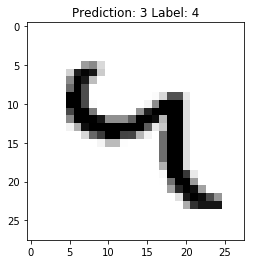

In [72]:
display_compare(250)

<IPython.core.display.Javascript object>


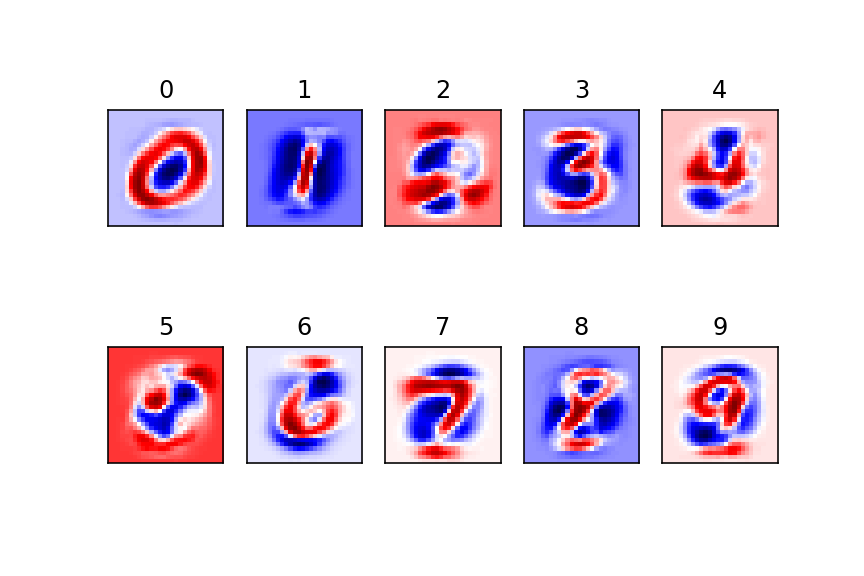

In [81]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,10)
ax.set_ylim(0,1)

for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)